In [1]:
import torch

t_c = [0.5, 14.0, 15.0, 28.0, 11.0] #섭씨 온도
t_u = [35.7, 55.9, 58.2, 81.9, 56.3] #모르는 어떠한 단위 값

t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [2]:
"""
w, b는 모델의 파라메터이며 데이터 기반으로 추정해야함
loss function은 non-linear function 사용 

"""

#모델 정의 : t_c = w*t_u + b

def model(t_u, w, b):
    return w*t_u + b

#loss 정의 : t_p(출력) - t_c(gt), mean squared error
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()

w = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w, b)
loss = loss_fn(t_p, t_c)
print(f'Output : {t_p} || loss : {loss}')


Output : tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000]) || loss : 1963.6380615234375


In [6]:
#손실함수 최적화는 gradient descent 적용
#손실이 줄어드는 방향으로 학습을 해야함

delta = 0.1

loss_rate_of_change_w = (
    loss_fn(model(t_u, w+delta, b), t_c) - loss_fn(model(t_u, w - delta, b), t_c)
) / (2.0 * delta)

loss_rate_of_change_b = (
    loss_fn(model(t_u, w, b+delta), t_c) - loss_fn(model(t_u, w , b- delta), t_c)
) / (2.0 * delta)

print(loss_rate_of_change_w, loss_rate_of_change_b)

tensor(5231.1567) tensor(87.7979)


In [7]:
leraning_rate = 1e-2 #학습 스케일링의 비율로써 학습률을 나타냄
w = w - leraning_rate*loss_rate_of_change_w
b = b - leraning_rate*loss_rate_of_change_b

print(f'updated weights : {w}, updated bias : {b}')

updated weights : -51.31156539916992, updated bias : -0.877978503704071


In [8]:
#함수 미분을 통해서 기울기를 구하고 이 값을 이용해서 최소화하는 방향으로 학습

#loss 정의 : t_p(출력) - t_c(gt), mean squared error
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()

#loss function 미분
def d_loss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

#weight, bias 미분(모델에 대해서)
def d_model_dw(t_u, w, b):
    return t_u

def d_model_db(t_u, w, b):
    return 1.0

#gradient 계산
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = d_loss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * d_model_dw(t_u, w, b)
    dloss_db = dloss_dtp * d_model_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

# w와 b가 최대한 변하지 않을때까지 조정함
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    
    for epoch in range(1, n_epochs+1):
        w, b = params
        t_p = model(t_u, w, b) #forward
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b) #backward
        
        params = params - learning_rate * grad
        
        print(f'Epoch : {epoch}, Loss : {float(loss)}')
        
    return params

In [9]:
"""
10epoch 이후 inf 값 나오는 이유 : 파라메터 조정이 너무 크기때문에 수렴하는 것이 아니라 발산하게 됨
점차적인 조정이 필요 -> learning rate 조정
"""

training_loop(
    n_epochs=100,
    learning_rate=1e-2,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_u,
    t_c = t_c
)

Epoch : 1, Loss : 1963.6380615234375
Epoch : 2, Loss : 9400946.0
Epoch : 3, Loss : 45636636672.0
Epoch : 4, Loss : 221542415859712.0
Epoch : 5, Loss : 1.0754745168864215e+18
Epoch : 6, Loss : 5.22087555512282e+21
Epoch : 7, Loss : 2.534467112992931e+25
Epoch : 8, Loss : 1.2303537464253095e+29
Epoch : 9, Loss : 5.972734956579123e+32
Epoch : 10, Loss : 2.899456653082822e+36
Epoch : 11, Loss : inf
Epoch : 12, Loss : inf
Epoch : 13, Loss : inf
Epoch : 14, Loss : inf
Epoch : 15, Loss : inf
Epoch : 16, Loss : inf
Epoch : 17, Loss : inf
Epoch : 18, Loss : inf
Epoch : 19, Loss : inf
Epoch : 20, Loss : inf
Epoch : 21, Loss : inf
Epoch : 22, Loss : nan
Epoch : 23, Loss : nan
Epoch : 24, Loss : nan
Epoch : 25, Loss : nan
Epoch : 26, Loss : nan
Epoch : 27, Loss : nan
Epoch : 28, Loss : nan
Epoch : 29, Loss : nan
Epoch : 30, Loss : nan
Epoch : 31, Loss : nan
Epoch : 32, Loss : nan
Epoch : 33, Loss : nan
Epoch : 34, Loss : nan
Epoch : 35, Loss : nan
Epoch : 36, Loss : nan
Epoch : 37, Loss : nan
Epoc

tensor([nan, nan])

In [10]:
training_loop(
    n_epochs=100,
    learning_rate=1e-4,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_u,
    t_c = t_c
)

Epoch : 1, Loss : 1963.6380615234375
Epoch : 2, Loss : 193.63868713378906
Epoch : 3, Loss : 41.417152404785156
Epoch : 4, Loss : 28.325439453125
Epoch : 5, Loss : 27.1989688873291
Epoch : 6, Loss : 27.101520538330078
Epoch : 7, Loss : 27.09256362915039
Epoch : 8, Loss : 27.09122085571289
Epoch : 9, Loss : 27.090526580810547
Epoch : 10, Loss : 27.08989906311035
Epoch : 11, Loss : 27.08926010131836
Epoch : 12, Loss : 27.088634490966797
Epoch : 13, Loss : 27.0880069732666
Epoch : 14, Loss : 27.087383270263672
Epoch : 15, Loss : 27.086750030517578
Epoch : 16, Loss : 27.08612060546875
Epoch : 17, Loss : 27.085498809814453
Epoch : 18, Loss : 27.084875106811523
Epoch : 19, Loss : 27.084239959716797
Epoch : 20, Loss : 27.0836124420166
Epoch : 21, Loss : 27.082983016967773
Epoch : 22, Loss : 27.082361221313477
Epoch : 23, Loss : 27.081729888916016
Epoch : 24, Loss : 27.08109474182129
Epoch : 25, Loss : 27.080474853515625
Epoch : 26, Loss : 27.079845428466797
Epoch : 27, Loss : 27.07921409606933

tensor([ 0.2602, -0.0371])

Epoch : 1, Loss : 117.1396713256836
Epoch : 2, Loss : 34.44367980957031
Epoch : 3, Loss : 28.14862060546875
Epoch : 4, Loss : 27.616064071655273
Epoch : 5, Loss : 27.518268585205078
Epoch : 6, Loss : 27.453411102294922
Epoch : 7, Loss : 27.39117431640625
Epoch : 8, Loss : 27.329265594482422
Epoch : 9, Loss : 27.26751136779785
Epoch : 10, Loss : 27.205913543701172
Epoch : 11, Loss : 27.144460678100586
Epoch : 12, Loss : 27.083154678344727
Epoch : 13, Loss : 27.021984100341797
Epoch : 14, Loss : 26.960979461669922
Epoch : 15, Loss : 26.900096893310547
Epoch : 16, Loss : 26.839374542236328
Epoch : 17, Loss : 26.778783798217773
Epoch : 18, Loss : 26.718338012695312
Epoch : 19, Loss : 26.658044815063477
Epoch : 20, Loss : 26.597890853881836
Epoch : 21, Loss : 26.53787612915039
Epoch : 22, Loss : 26.478008270263672
Epoch : 23, Loss : 26.418283462524414
Epoch : 24, Loss : 26.358688354492188
Epoch : 25, Loss : 26.299245834350586
Epoch : 26, Loss : 26.239938735961914
Epoch : 27, Loss : 26.18077

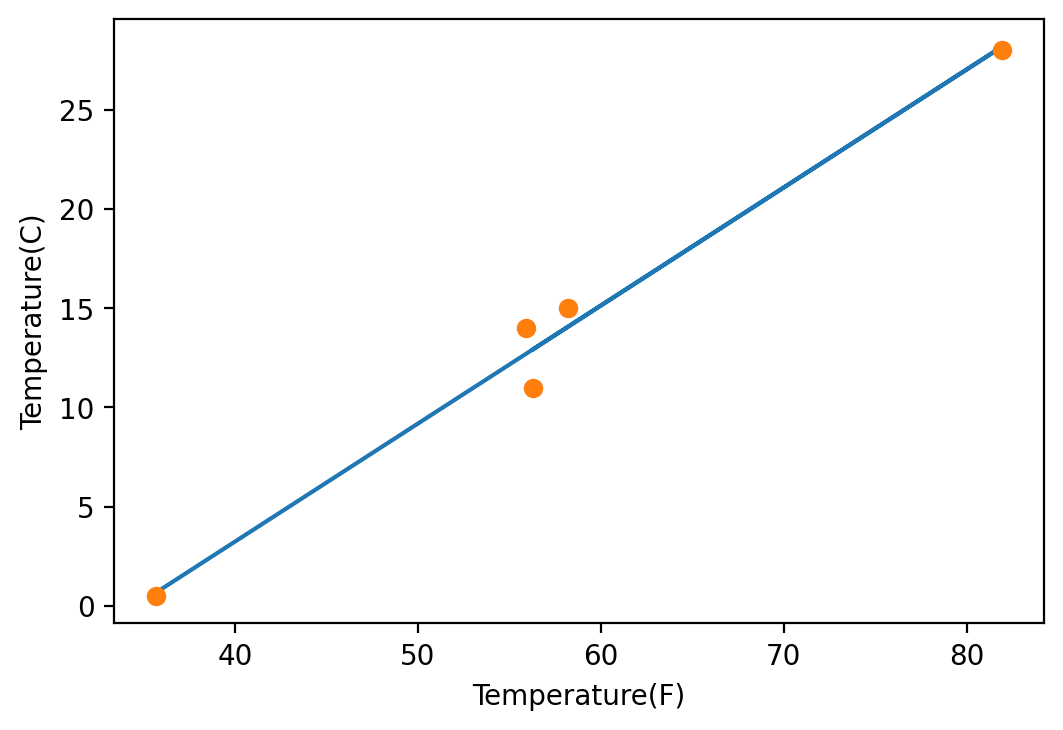

In [12]:
from matplotlib import pyplot as plt
%matplotlib inline


t_un = t_u * 0.1
params = training_loop(
    n_epochs=5000, learning_rate=1e-2,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_un,
    t_c = t_c
)

t_p = model(t_un, *params)
fig = plt.figure(dpi=200)
plt.xlabel("Temperature(F)")
plt.ylabel("Temperature(C)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [13]:
#AutoGrad
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    
    for epoch in range(1, n_epochs+1):
        if params.grad is not None:
            params.grad.zero_()
        
        t_p = model(t_u, *params) #forward
        loss = loss_fn(t_p, t_c)
        loss.backward()
        
        with torch.no_grad():
            params -= learning_rate * params.grad
        
        if epoch % 500 == 0:
            print(f'Epoch : {epoch}, Loss : {float(loss)}')
        
    return params

params = training_loop(
    n_epochs=5000, learning_rate=1e-2,
    params = torch.tensor([1.0, 0.0], requires_grad=True),
    t_u = t_un,
    t_c = t_c
)

Epoch : 500, Loss : 9.382543563842773
Epoch : 1000, Loss : 3.750368118286133
Epoch : 1500, Loss : 2.0306830406188965
Epoch : 2000, Loss : 1.5056078433990479
Epoch : 2500, Loss : 1.3452855348587036
Epoch : 3000, Loss : 1.2963331937789917
Epoch : 3500, Loss : 1.2813855409622192
Epoch : 4000, Loss : 1.276820421218872
Epoch : 4500, Loss : 1.275429368019104
Epoch : 5000, Loss : 1.2750012874603271


In [14]:
#optimizer 사용하기
import torch.optim as optim
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_multi_tensor',
 'functional',
 'lr_scheduler',
 'swa_utils']

In [15]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr = learning_rate) #확률적 경사하강 -> 미니배치에 대해서 평균 계산

t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
loss.backward()
optimizer.step()
params

tensor([ 9.4769e-01, -8.7800e-04], requires_grad=True)

In [17]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr = learning_rate) #확률적 경사하강 -> 미니배치에 대해서 평균 계산

t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)

optimizer.zero_grad()
loss.backward()
optimizer.step()
params

tensor([-51.3116,  -0.8780], requires_grad=True)

In [19]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    
    for epoch in range(1, n_epochs+1):
        
        t_p = model(t_u, *params) #forward
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 500 == 0:
            print(f'Epoch : {epoch}, Loss : {float(loss)}')
        
    return params

params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr = learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer, params = params, t_u = t_un, t_c = t_c
)

Epoch : 500, Loss : 9.382543563842773
Epoch : 1000, Loss : 3.750368118286133
Epoch : 1500, Loss : 2.0306830406188965
Epoch : 2000, Loss : 1.5056078433990479
Epoch : 2500, Loss : 1.3452855348587036
Epoch : 3000, Loss : 1.2963331937789917
Epoch : 3500, Loss : 1.2813855409622192
Epoch : 4000, Loss : 1.276820421218872
Epoch : 4500, Loss : 1.275429368019104
Epoch : 5000, Loss : 1.2750012874603271


tensor([  5.9475, -20.5542], requires_grad=True)